In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from filo import create_bins_centered_on, resample_dataframe
%matplotlib inline

In [2]:
data_folder = Path('data/isotherm/')
pressure_file = data_folder / 'ValvePID_Pressure_resampled.tsv'
analysis_file = data_folder / 'Spectro_WLI.tsv'
pressure_file.exists()

True

In [3]:
pressure_data = pd.read_csv(pressure_file, sep='\t').set_index('time (unix)')
analysis_data = pd.read_csv(analysis_file, sep='\t').set_index('time (unix)')
analysis_data.tail()

,num,folder,filename,opl,contrast
time (unix),,,,,
1.659009e+09,22,WLI_Spectra,2106297U1_0007.Raw8.txt,13.929712,42.667708
1.659009e+09,24,WLI_Spectra,2106297U1_0008.Raw8.txt,13.928008,42.686275
1.659009e+09,26,WLI_Spectra,2106297U1_0009.Raw8.txt,13.929712,42.700220
1.659009e+09,28,WLI_Spectra,2106297U1_0010.Raw8.txt,13.928008,42.693740
1.659009e+09,30,WLI_Spectra,2106297U1_0011.Raw8.txt,13.928008,42.736708


In [4]:
create_bins_centered_on(analysis_data.index)

[(1659007967.5, 1659008032.5),
 (1659008037.5, 1659008092.5),
 (1659008092.5, 1659008147.5),
 (1659008150.0, 1659008210.0),
 (1659008210.0, 1659008270.0),
 (1659008272.5, 1659008337.5),
 (1659008567.5, 1659008632.5),
 (1659008635.0, 1659008695.0),
 (1659008695.0, 1659008755.0),
 (1659008757.5, 1659008812.5),
 (1659008812.5, 1659008867.5)]

In [10]:
df = resample_dataframe(
    dataframe=pressure_data.drop('dt (s)', axis=1),
    new_index=analysis_data.index,
    max_interval=15,
    agg=['mean', 'std']
)
df

setpt (Pa)       p (Pa)       valve    
                   mean std     mean std    mean std
time (unix)                                         
1.659008e+09        NaN NaN      NaN NaN     NaN NaN
1.659008e+09     350.00 NaN   350.19 NaN  3458.0 NaN
1.659008e+09        NaN NaN      NaN NaN     NaN NaN
1.659008e+09        NaN NaN      NaN NaN     NaN NaN
1.659008e+09        NaN NaN      NaN NaN     NaN NaN
1.659008e+09    1046.67 NaN  1007.29 NaN  3763.0 NaN
1.659009e+09        NaN NaN      NaN NaN     NaN NaN
1.659009e+09    2240.70 NaN  2106.50 NaN  4642.0 NaN
1.659009e+09    2251.70 NaN  2184.20 NaN  4830.0 NaN
1.659009e+09    2251.70 NaN  2212.66 NaN  4932.0 NaN
1.659009e+09        NaN NaN      NaN NaN     NaN NaN

In [6]:
np.isnan(df['p (Pa)']['mean'].iloc[-1])

True

In [7]:
def check_bins_graphically(max_interval=None):

    ts = analysis_data.index
    bins = create_bins_centered_on(ts, max_interval=max_interval)

    fig, ax = plt.subplots()
    for ti in ts:
        ax.plot(ti, 0, 'ok')

    for tj in pressure_data.index:
        ax.plot(tj, 1, '.b')

    for (ta, tb) in bins:
        ax.axvline(ta, linestyle=':', c='r')
        ax.axvline(tb, linestyle=':', c='r')

    return ax

<Axes: >

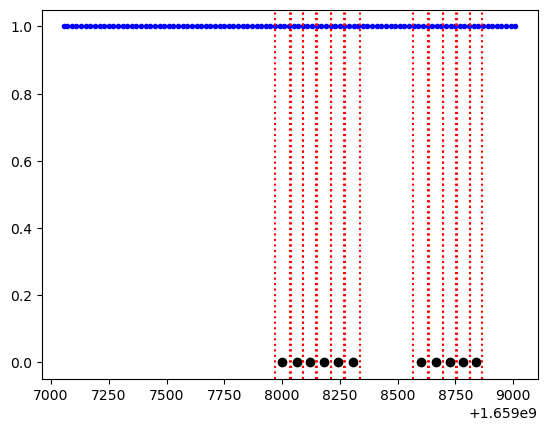

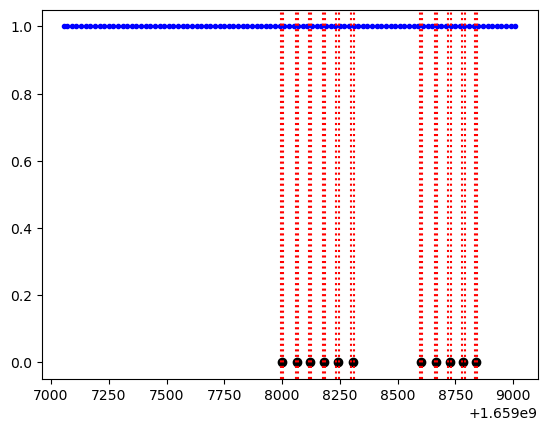

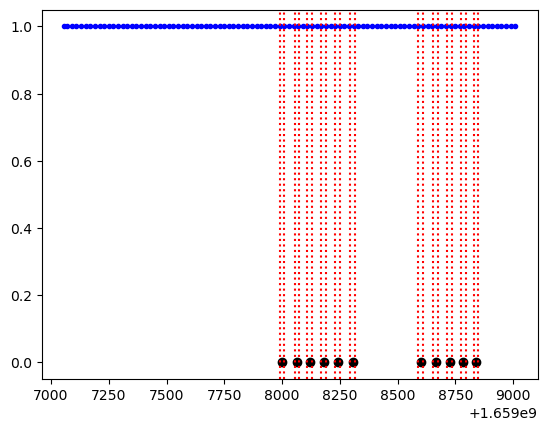

In [8]:
check_bins_graphically()
check_bins_graphically(max_interval=10)
check_bins_graphically(max_interval=20)